In [1]:
#SCRIPT PURPOSE: Turn LSV for Fuel Cells into a Crossover Value
#Author: Shan Kutagulla
#Inputs: Area of MEA

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

In [3]:
def determine_crossover(df, active_area,xlabel,ylabel,start_percentage,end_percentage):
    #Method: remove first X%, last Y%, linear fit, y-intercept is nominal crossover
    
    #check datatype of array to be DataFrame
    if isinstance(df, pd.DataFrame):
        start_pt=int(start_percentage*len(df)) #establish start point
        end_pt=int(end_percentage*len(df)) #establish end point
        df=df.iloc[start_pt:end_pt] #chop up data to get linear part of graph
        coeff=np.polyfit(df[xlabel],df[ylabel],deg=1) #polynomial fit degree 1 (line)
        plt.plot(df[xlabel],df[ylabel]) #plot data portion selected
        plt.plot(df[xlabel],(coeff[1]+coeff[0]*df[xlabel]))
        return coeff[1],coeff[1]/active_area, 1/coeff[0]
    else:
        print("ERROR: Not a DataFrame Object")
        return null

In [4]:
AREA=25 #area of MEA in cm2
filename="/Users/shanmukhkutagulla/My Drive/Fuel Cell Docs/Pstat Data 12142021/Linear Sweep Voltammetry Solo1563 ch1 (2021-12-14 18_29_36)/2_Linear Sweep Voltammetry-Potential Linear Sweep 20211214 182938.csv"

In [5]:
data=pd.read_csv(filename, usecols=["Working Electrode vs. NHE (V)","Current (mA)"],encoding='cp1252')

Text(0, 0.5, 'Current (mA)')

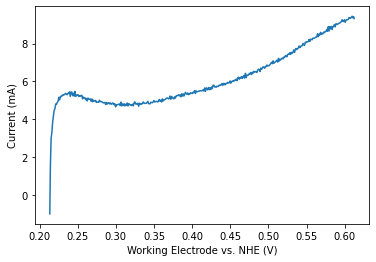

In [6]:
plt.plot(data["Working Electrode vs. NHE (V)"],data["Current (mA)"])
plt.xlabel("Working Electrode vs. NHE (V)")
plt.ylabel("Current (mA)")

Text(0, 0.5, 'Current Density (mA/cm2)')

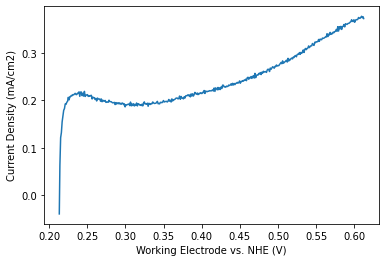

In [7]:
plt.plot(data["Working Electrode vs. NHE (V)"],data["Current (mA)"]/AREA)
plt.xlabel("Working Electrode vs. NHE (V)")
plt.ylabel("Current Density (mA/cm2)")

Crossover for Tested MEA:0.8607783560621362 mA
Crossover for Tested MEA per unit area:0.034431134242485444 mA/cm2
Short Resistance (Ohms):86.14996798262108 Ohms


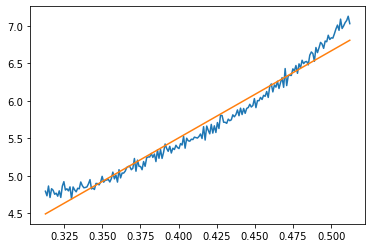

In [8]:
crossover_mea=determine_crossover(data,AREA,"Working Electrode vs. NHE (V)","Current (mA)",0.25,0.75)
print("Crossover for Tested MEA:" + str(crossover_mea[0]) + " mA")
print("Crossover for Tested MEA per unit area:" + str(crossover_mea[1]) + " mA/cm2")
print("Short Resistance (Ohms):" +str(crossover_mea[2]*1000)+ " Ohms")